            temp   humidity       wind       rain
count  40.000000  40.000000  40.000000  40.000000
mean   27.532000  77.700000   3.146000   0.439500
std     0.467822   3.329742   1.263119   0.605881
min    26.600000  71.000000   0.120000   0.000000
25%    27.082500  75.000000   2.382500   0.000000
50%    27.605000  78.000000   3.195000   0.165000
75%    27.922500  80.000000   3.850000   0.767500
max    28.310000  87.000000   5.500000   2.150000


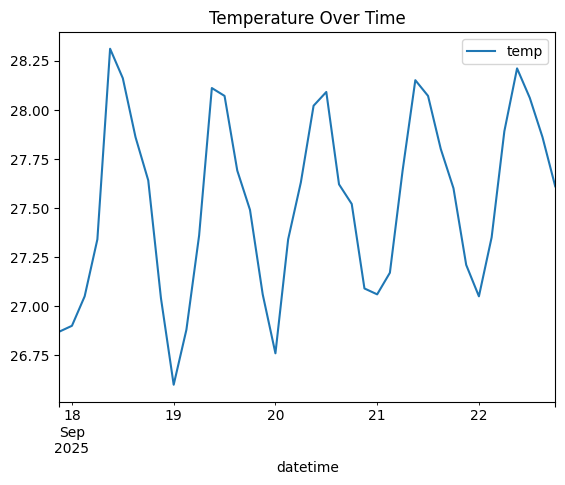

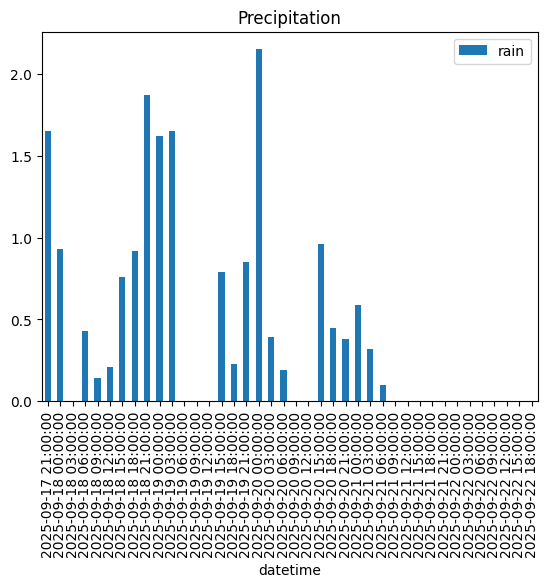

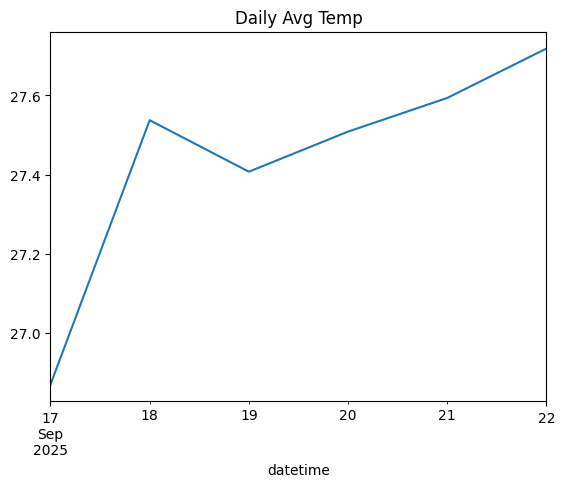

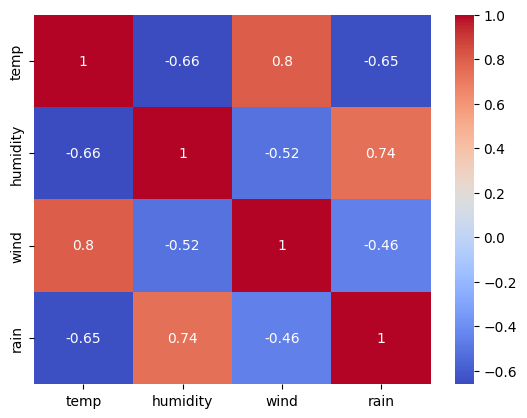

In [2]:
import requests, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# API setup
API_KEY, CITY = "fb365aa6104829b44455572365ff3b4e", "Mumbai"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

# Fetch & parse data
data = requests.get(url).json()
df = pd.DataFrame([{
    "datetime": e["dt_txt"],
    "temp": e["main"]["temp"],
    "humidity": e["main"]["humidity"],
    "wind": e["wind"]["speed"],
    "rain": e.get("rain", {}).get("3h", 0)
} for e in data["list"]])
df["datetime"] = pd.to_datetime(df["datetime"])

# Basic stats
print(df[["temp","humidity","wind","rain"]].describe())

# Plots
df.plot(x="datetime", y="temp", title="Temperature Over Time"); plt.show()
df.plot(x="datetime", y="rain", kind="bar", title="Precipitation"); plt.show()

# Daily average
df.resample("D", on="datetime").mean(numeric_only=True)["temp"].plot(title="Daily Avg Temp"); plt.show()

# Correlation heatmap
sns.heatmap(df[["temp","humidity","wind","rain"]].corr(), annot=True, cmap="coolwarm"); plt.show()
